In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
encoders = {}
askedColumnNames = ['Typ cery', 'Główny problem', 'Poboczny problem', 'Wrażliwa','Wiek']
categoricalColumnNames = ['Typ cery', 'Główny problem', 'Poboczny problem']
decisionColumnNames = ['Mycie','Serum na dzień','Krem na dzień','SPF','Serum na noc','Krem na noc','Punktowo','Maseczka','Peeling']
allColumns = askedColumnNames + decisionColumnNames
allCategoricalColumns = categoricalColumnNames + decisionColumnNames

In [3]:
ASKED_COLUMN_NAMES = ['Typ cery', 'Główny problem', 'Poboczny problem', 'Wrażliwa','Wiek']
CATEGORICAL_COLUMN_NAMES = ['Typ cery', 'Główny problem', 'Poboczny problem']
DECISION_COLUMN_NAMES = ['Mycie',
'Serum na dzień',
'Krem na dzień',
'SPF',
'Serum na noc',
'Krem na noc',
'Punktowo',
'Maseczka',
'Peeling'
]
ALL_COLUMNS = ASKED_COLUMN_NAMES + DECISION_COLUMN_NAMES
ALL_CATEGORICAL_COLUMNS = CATEGORICAL_COLUMN_NAMES + DECISION_COLUMN_NAMES

In [5]:
dataset = pd.read_csv("DATASET.csv", encoding='utf-16')

In [6]:
dataset.shape

(5218, 14)

In [7]:
dataset.dtypes

Typ cery            object
Wrażliwa             int64
Główny problem      object
Poboczny problem    object
Wiek                 int64
Mycie               object
Serum na dzień      object
Krem na dzień       object
SPF                 object
Serum na noc        object
Krem na noc         object
Punktowo            object
Maseczka            object
Peeling             object
dtype: object

In [8]:
dataset.head(1)

,Typ cery,Wrażliwa,Główny problem,Poboczny problem,Wiek,Mycie,Serum na dzień,Krem na dzień,SPF,Serum na noc,Krem na noc,Punktowo,Maseczka,Peeling
0,Tłusta,0,Nadprodukcja sebum,Niedoskonałości,17,Neutrogena Visibly Clear Clear & Defend Facial...,Revox Just Niacinamide 10%,Tołpa - Authentic - Krem Matowa Skóra,SVR Sebiaclear Creme SPF 50,Eveline Cosmetics Beauty & Glow Matujące Serum...,SVR Sebiaclear Hydra,Bandi - Sebo Care - Pasta Punktowa na Niedosko...,Nacomi Next Lvl Kwas Salicylowy 2% + Nature Qu...,Brak


In [34]:
#read labeled data from csv
import numpy as np
labeledDataset = pd.read_csv("labeledDataset.csv", sep=',')

#drop id column
labeledDataset = labeledDataset.drop(columns=['ID'])
for column in labeledDataset:
    print(column, np.unique(labeledDataset[column]))


Typ cery [0 1 2 3]
Wrażliwa [0 1]
Główny problem [0 1 2 3 4 5 6 7]
Poboczny problem [0 1 2 3 4 5 6 7 8 9]
Wiek [16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37]
Mycie [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Serum na dzień [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]
Krem na dzień [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]
SPF [ 0  1  2  3  4  5  6  7  8  9 10 11]
Serum na noc [ 0  1  2  3  4  5  6  7  8  9 10 11 12]
Krem na noc [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]
Punktowo [ 0  1  2  3  4  5  6  7  8  9 10 11 12]
Maseczka [ 0  1  2  3  4  5  6  7  8  9 10 11 12]
Peeling [0 1 2 3 4 5 6 7 8 9]


In [7]:
dataset.head(1)

,Typ cery,Wrażliwa,Główny problem,Poboczny problem,Wiek,Mycie,Serum na dzień,Krem na dzień,SPF,Serum na noc,Krem na noc,Punktowo,Maseczka,Peeling
0,Tłusta,0,Nadprodukcja sebum,Niedoskonałości,17,Neutrogena Visibly Clear Clear & Defend Facial...,Revox Just Niacinamide 10%,Tołpa - Authentic - Krem Matowa Skóra,SVR Sebiaclear Creme SPF 50,Eveline Cosmetics Beauty & Glow Matujące Serum...,SVR Sebiaclear Hydra,Bandi - Sebo Care - Pasta Punktowa na Niedosko...,Nacomi Next Lvl Kwas Salicylowy 2% + Nature Qu...,Brak


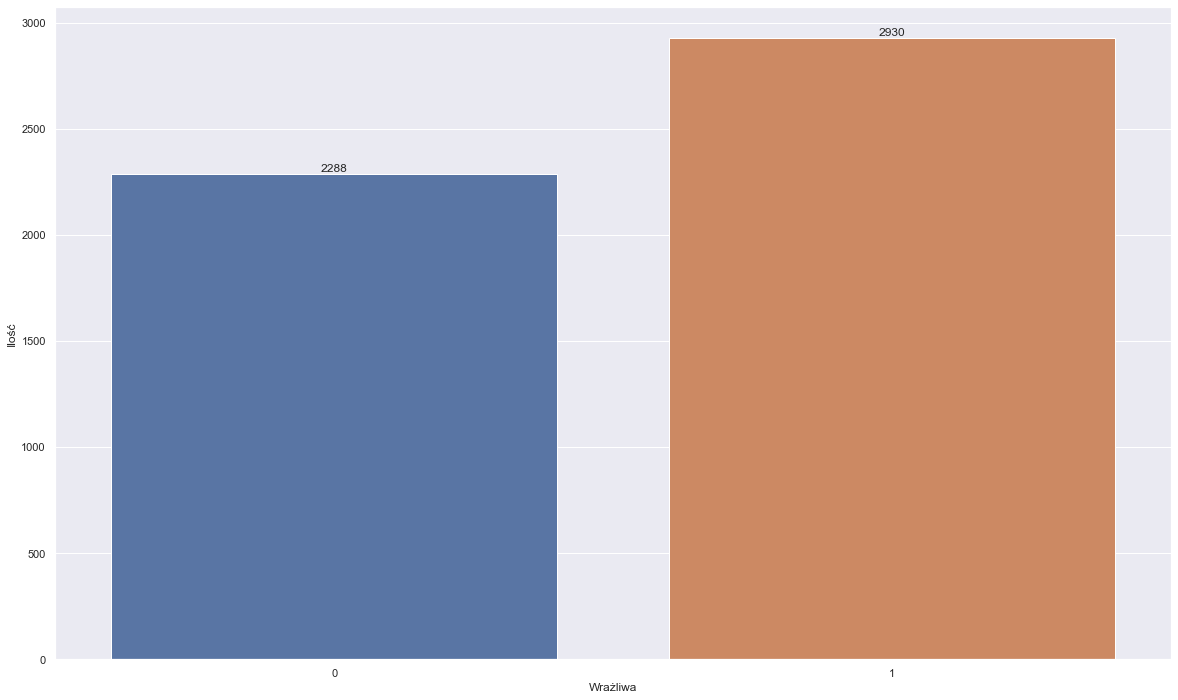

In [16]:
sn.set(rc={'figure.figsize':(20,12)})
isSenstivieBar = sn.countplot(x="Wrażliwa", data=dataset)
isSenstivieBar.set(ylabel='Ilość')
isSenstivieBar.bar_label(isSenstivieBar.containers[0])
plt.savefig('wrazliwa.png', transparent=True)

In [9]:
dataset['Typ cery'].unique()

array(['Tłusta', 'Mieszana', 'Normalna', 'Sucha'], dtype=object)

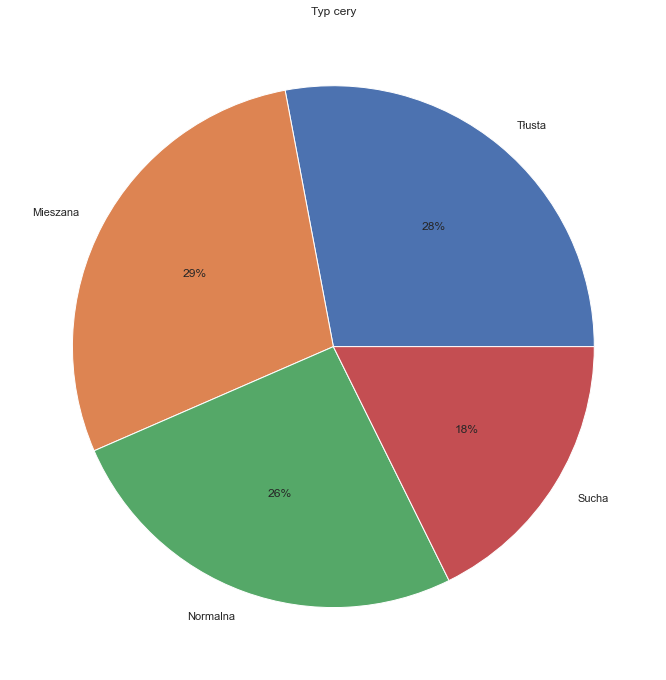

In [17]:
data = [dataset['Typ cery'].value_counts()['Tłusta'], dataset['Typ cery'].value_counts()['Mieszana'], dataset['Typ cery'].value_counts()['Normalna'], dataset['Typ cery'].value_counts()['Sucha']]
labels = ['Tłusta', 'Mieszana', 'Normalna', 'Sucha']

plt.pie(data, labels = labels, autopct='%.0f%%')
plt.title('Typ cery')
plt.show()

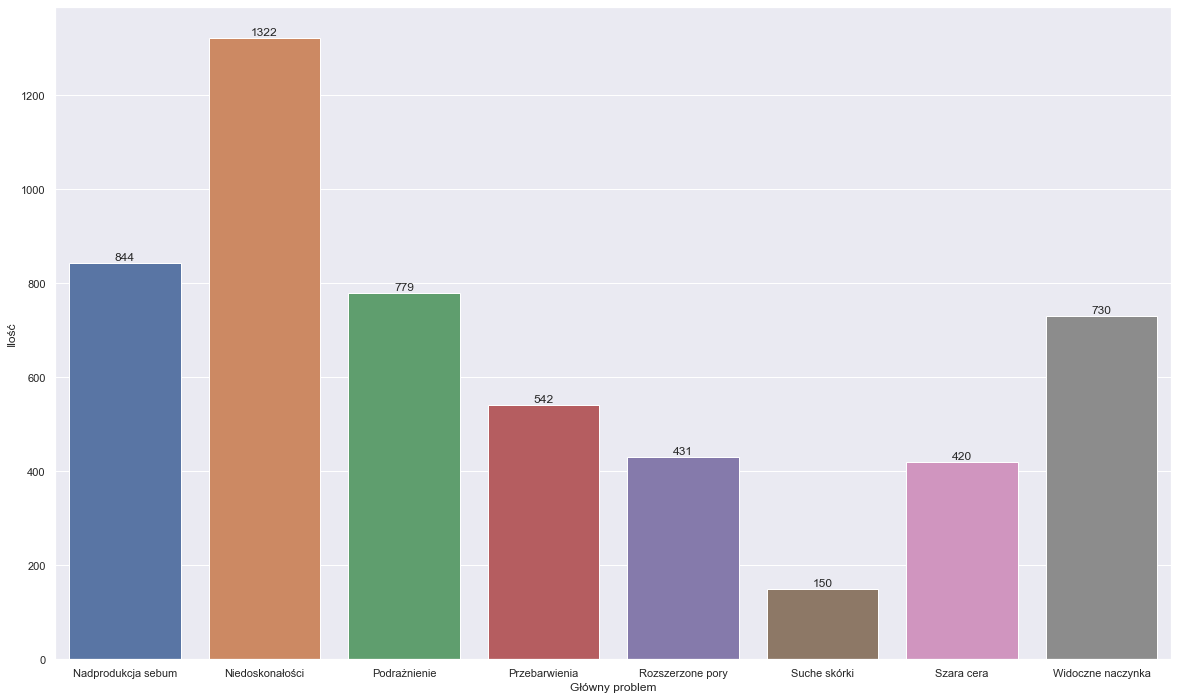

In [18]:
mainIssue = sn.countplot(x="Główny problem", data=dataset)
mainIssue.set(ylabel='Ilość')
mainIssue.bar_label(mainIssue.containers[0])
plt.savefig('glowny_problem.png', transparent=True)

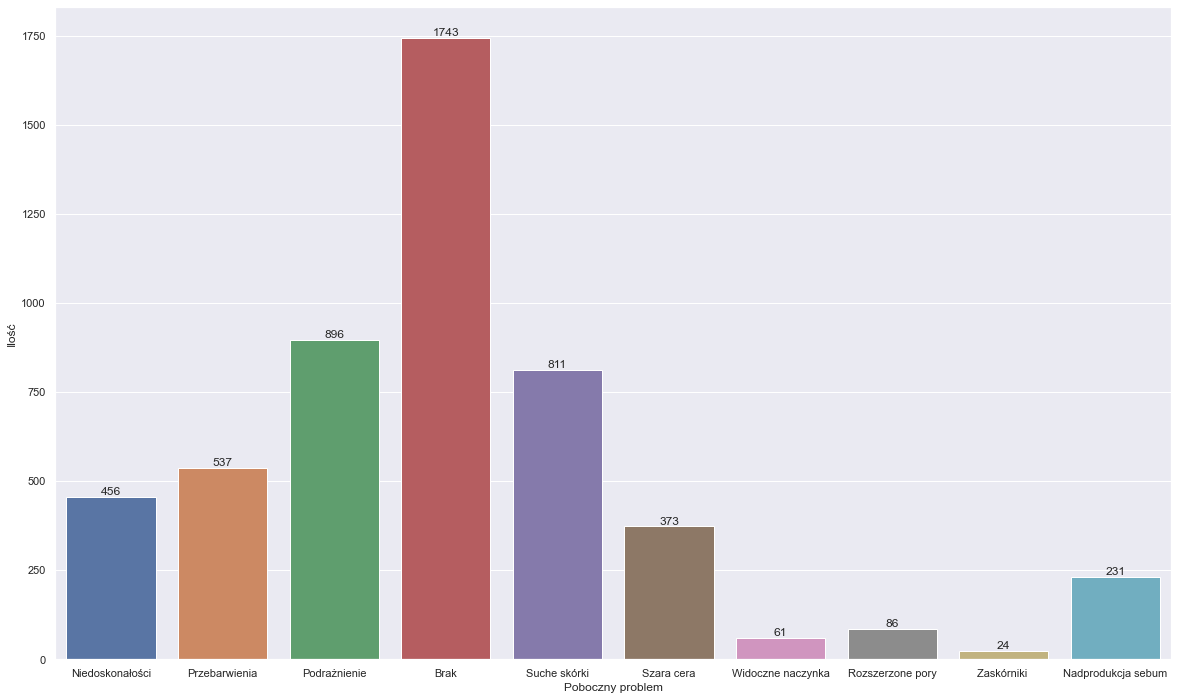

In [19]:
secondIssue = sn.countplot(x="Poboczny problem", data=dataset)
secondIssue.set(ylabel='Ilość')
secondIssue.bar_label(secondIssue.containers[0])
plt.savefig('poboczny_problem.png', transparent=True)

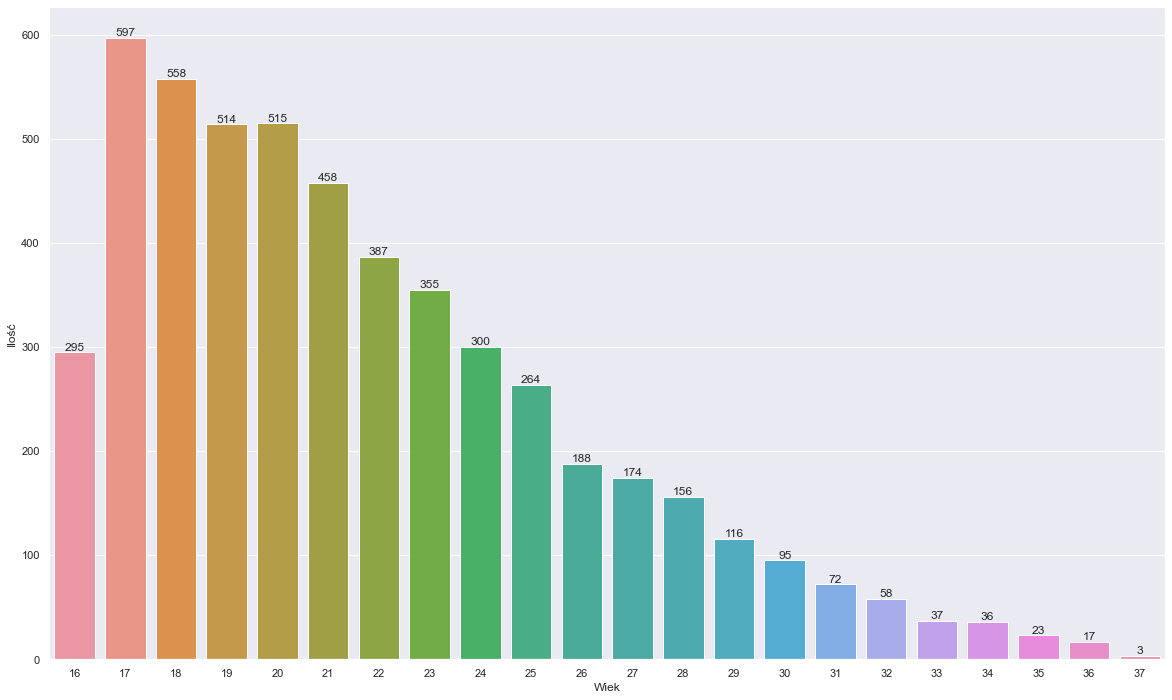

In [20]:
age = sn.countplot(x="Wiek", data=dataset)
age.set(ylabel='Ilość')
age.bar_label(age.containers[0])
plt.savefig('wiek_bar.png', transparent=True)

In [14]:
def createLabelEncoding(datasetToEncode):
    global encoders
    
    for i in allCategoricalColumns:
        encoders[i] = LabelEncoder()
        uniqueValues = list(datasetToEncode[i].unique())
        encoders[i] = encoders[i].fit(uniqueValues)
        datasetToEncode[i] = encoders[i].transform(datasetToEncode[i])
        
    return datasetToEncode

In [15]:
dum_df = createLabelEncoding(dataset)

In [16]:
dataset.mean()

Typ cery             1.616883
Wrażliwa             0.493506
Główny problem       3.162338
Poboczny problem     2.194805
Wiek                19.324675
Mycie                4.974026
Serum na dzień       2.935065
Krem na dzień        4.064935
SPF                  2.597403
Serum na noc         3.876623
Krem na noc          4.642857
Punktowo             1.077922
Maseczka             3.474026
Peeling              1.850649
dtype: float64

In [17]:
dum_df.columns

Index(['Typ cery', 'Wrażliwa', 'Główny problem', 'Poboczny problem', 'Wiek',
       'Mycie', 'Serum na dzień', 'Krem na dzień', 'SPF', 'Serum na noc',
       'Krem na noc', 'Punktowo', 'Maseczka', 'Peeling'],
      dtype='object')

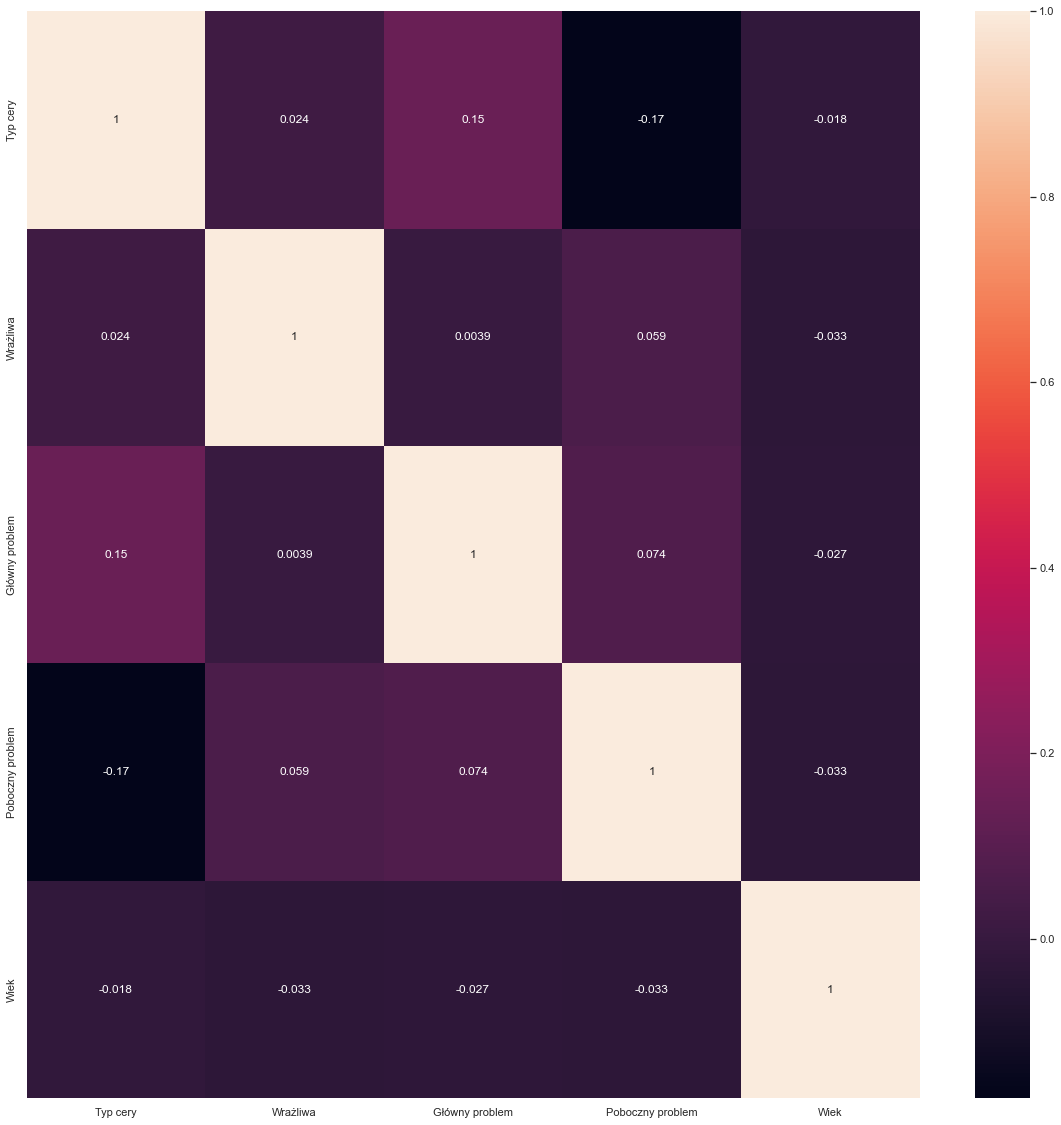

In [18]:
catDumDf = dum_df[['Typ cery', 'Wrażliwa', 'Główny problem', 'Poboczny problem', 'Wiek']]
corrMatrix = catDumDf.corr()
fig, ax = plt.subplots(figsize=(20,20))
sn.heatmap(corrMatrix, annot=True)
plt.savefig('macierz_korelacji.png', transparent=True)
plt.show()